# Compute AA frequencies 

from random subset of uniref50 (about 16k sequences)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_context('talk')
import matplotlib.pyplot as plt

In [31]:
full_seq = ''
seq = {'seq':[], 'len':[]}

with open('random_uniref50.fa', 'r') as f:
    lines = f.readlines()
    for l in lines:
        if l[0] == '>':
            pass
        else:
            full_seq += l
            seq['seq'].append(l.strip())
            seq['len'].append(len(l))
            
df = pd.DataFrame.from_dict(seq)

# compute fraction of each residue for each sequence
for aa in 'ACDEFGHIKLMNPQRSTVWY':
    df['frac' + aa] = df['seq'].apply(lambda x: x.count(aa) / len(x))
    
df

,seq,len,fracA,fracC,fracD,fracE,fracF,fracG,fracH,fracI,...,fracM,fracN,fracP,fracQ,fracR,fracS,fracT,fracV,fracW,fracY
0,ILELGLLGWAVLLIMTVKVGWEMTVGPIPGTESIIGTRTVDEVHLL...,61,0.050000,0.000000,0.016667,0.066667,0.000000,0.150000,0.016667,0.100000,...,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.100000,0.150000,0.050000,0.000000
1,CLEGDDSLQVRVQRLHEKVSLLAVQCPEELSGAVRHLSREFELMQE...,61,0.066667,0.033333,0.050000,0.133333,0.016667,0.050000,0.033333,0.016667,...,0.033333,0.000000,0.033333,0.066667,0.100000,0.066667,0.016667,0.116667,0.000000,0.000000
2,VPSVTRTVGIAPALAVDNPEYVLGWIGEGSNPERAPKQHAAFKELI...,61,0.133333,0.000000,0.050000,0.066667,0.016667,0.100000,0.033333,0.050000,...,0.000000,0.033333,0.116667,0.016667,0.050000,0.033333,0.033333,0.100000,0.033333,0.033333
3,LLSLNAAIEAARAGEAGKGFAVVAAEVKSLAQRSRQSAEHIADMIG...,61,0.266667,0.000000,0.050000,0.066667,0.016667,0.083333,0.016667,0.050000,...,0.033333,0.016667,0.000000,0.050000,0.050000,0.100000,0.000000,0.050000,0.000000,0.000000
4,TAAAGAPARRKTKSGGGGGADTAAAGKGGGKGGGKGGRGGRGGRGGGE,49,0.187500,0.000000,0.020833,0.020833,0.000000,0.458333,0.000000,0.000000,...,0.000000,0.000000,0.020833,0.000000,0.104167,0.020833,0.062500,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16762,VKRAEGKLSNARFVDKAPAPVVEAEREKLRSNGRLLETLRSRLDDYL,48,0.106383,0.000000,0.063830,0.106383,0.021277,0.042553,0.000000,0.000000,...,0.000000,0.042553,0.042553,0.000000,0.148936,0.063830,0.021277,0.085106,0.000000,0.021277
16763,QVFTALIPNICKLNIFNNPFKDIIDPEVAEYLIHIYLPKLQFINEI...,61,0.033333,0.050000,0.066667,0.066667,0.083333,0.000000,0.016667,0.150000,...,0.000000,0.083333,0.083333,0.033333,0.000000,0.016667,0.033333,0.033333,0.000000,0.066667
16764,FPASVPDGSSSHDDNKPIIEVESSSPASIPDGSFSRDDNKPTTEIP...,61,0.033333,0.000000,0.100000,0.066667,0.050000,0.033333,0.016667,0.083333,...,0.000000,0.033333,0.133333,0.016667,0.083333,0.166667,0.050000,0.033333,0.000000,0.016667
16765,SLLETINGEITNKIDIVKDPKNIKLIDIVDNIITVYSNKADKYIVY...,61,0.016667,0.000000,0.100000,0.050000,0.000000,0.016667,0.000000,0.183333,...,0.000000,0.150000,0.016667,0.000000,0.000000,0.066667,0.050000,0.083333,0.000000,0.066667


<AxesSubplot:xlabel='len', ylabel='Count'>

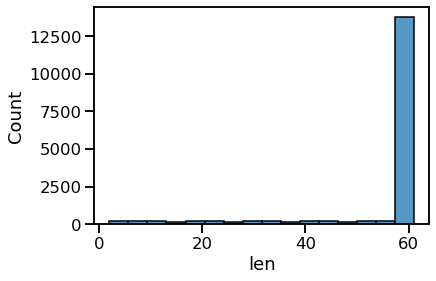

In [32]:
sns.histplot(df['len'])

In [66]:
mean_v = {'aa':[], 'mean':[]}
aa_dict = {}

all_seq = ''.join(df['seq'].values)

for aa in 'ACDEFGHIKLMNPQRSTVWY':
    print(aa, df['frac'+aa].mean())
    aa_dict[aa] = df['frac'+aa].mean()
    mean_v['aa'].append('frac'+aa)
    mean_v['mean'].append(df['frac'+aa].mean())

mean_df = pd.DataFrame.from_dict(mean_v)

print(aa_dict)
print(np.sum(list(aa_dict.values())))

A 0.08792778710242188
C 0.01490447165931344
D 0.05376829211614807
E 0.06221732055447876
F 0.0387452994166819
G 0.06967025329309677
H 0.0220976574048796
I 0.05310343411361993
K 0.050663741170247516
L 0.09526978211127052
M 0.02104293453672198
N 0.04018028904075636
P 0.051666128157006476
Q 0.03820000002411093
R 0.061578750547546295
S 0.07520039163719089
T 0.05700516530640848
V 0.06437948487920657
W 0.013588957652402187
Y 0.02837870159741062
{'A': 0.08792778710242188, 'C': 0.01490447165931344, 'D': 0.05376829211614807, 'E': 0.06221732055447876, 'F': 0.0387452994166819, 'G': 0.06967025329309677, 'H': 0.0220976574048796, 'I': 0.05310343411361993, 'K': 0.050663741170247516, 'L': 0.09526978211127052, 'M': 0.02104293453672198, 'N': 0.04018028904075636, 'P': 0.051666128157006476, 'Q': 0.03820000002411093, 'R': 0.061578750547546295, 'S': 0.07520039163719089, 'T': 0.05700516530640848, 'V': 0.06437948487920657, 'W': 0.013588957652402187, 'Y': 0.02837870159741062}
0.9995888423209192


(-0.01, 0.25)

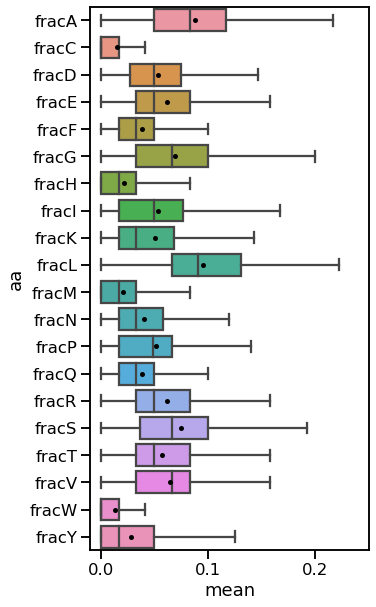

In [44]:
frac_df = df[[f for f in df.columns if 'frac' in f]]
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(x='value', y='variable', data=frac_df.melt(), fliersize=0)
sns.swarmplot(x='mean', y='aa', data=mean_df, color='k')
plt.xlim([-0.01,.25])

### Use these as of 210806

In [67]:
{'A':0.08792778710242188,
'C':0.01490447165931344,
'D':0.05376829211614807,
'E':0.06221732055447876,
'F':0.0387452994166819,
'G':0.06967025329309677,
'H':0.0220976574048796,
'I':0.05310343411361993,
'K':0.050663741170247516,
'L':0.09526978211127052,
'M':0.02104293453672198,
'N':0.04018028904075636,
'P':0.051666128157006476,
'Q':0.03820000002411093,
'R':0.061578750547546295,
'S':0.07520039163719089,
'T':0.05700516530640848,
'V':0.06437948487920657,
'W':0.013588957652402187,
'Y':0.02837870159741062}

{'A': 0.08792778710242188,
 'C': 0.01490447165931344,
 'D': 0.05376829211614807,
 'E': 0.06221732055447876,
 'F': 0.0387452994166819,
 'G': 0.06967025329309677,
 'H': 0.0220976574048796,
 'I': 0.05310343411361993,
 'K': 0.050663741170247516,
 'L': 0.09526978211127052,
 'M': 0.02104293453672198,
 'N': 0.04018028904075636,
 'P': 0.051666128157006476,
 'Q': 0.03820000002411093,
 'R': 0.061578750547546295,
 'S': 0.07520039163719089,
 'T': 0.05700516530640848,
 'V': 0.06437948487920657,
 'W': 0.013588957652402187,
 'Y': 0.02837870159741062}